In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [2]:
adv_works = pd.read_csv('AdvWorksCusts.csv')
adv_month_spend = pd.read_csv('AW_AveMonthSpend.csv')
bike_buyer= pd.read_csv('AW_BikeBuyer.csv')
merged_df1=pd.merge(adv_works, adv_month_spend, how="left", on='CustomerID')
merged_df=pd.merge(merged_df1, bike_buyer, how="left", on='CustomerID')
#merged_df=pd.merge(merged_df2, income_year, how="left", on='CustomerID')
test_data= pd.read_csv('AW_test.csv')

#merged_df.columns

In [3]:
merged_final=merged_df.drop(['Title','FirstName','MiddleName','LastName','Suffix',
                        'AddressLine1','AddressLine2','StateProvinceName',
       'CountryRegionName', 'PostalCode','PhoneNumber','BikeBuyer'], axis=1)


test=test_data.drop(['Title','FirstName','MiddleName','LastName','Suffix',                        'AddressLine1','AddressLine2','StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber'], axis=1)

In [4]:
children_categories = {0: "0",
                       1:"1-2", 
                    2:"1-2",
                      3:"3-4",
                      4:"3-4"}
merged_final[ 'NumberCarsOwned'] = [children_categories[x] for x in merged_final[ 'NumberCarsOwned']]

children_categories = {0: "< 1",
                       1:"< 1", 
                    2:"2-3",
                      3:"2-3",
                      4:"4-5",
                      5:"4-5"}
merged_final['NumberChildrenAtHome'] = [children_categories[x] for x in merged_final['NumberChildrenAtHome']]


In [5]:
children_categories = {0: "0",
                       1:"1-2", 
                    2:"1-2",
                      3:"3-4",
                      4:"3-4"}
test[ 'NumberCarsOwned'] = [children_categories[x] for x in test[ 'NumberCarsOwned']]

children_categories = {0: "< 1",
                       1:"< 1", 
                    2:"2-3",
                      3:"2-3",
                      4:"4-5",
                      5:"4-5"}
test['NumberChildrenAtHome'] = [children_categories[x] for x in test['NumberChildrenAtHome']]


In [6]:
def count_unique(merged_final, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(merged_final[col].value_counts())

cat_cols = ['Education', 'Occupation', 'Gender', 'MaritalStatus', 
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
count_unique(merged_final, cat_cols)


For column Education
Bachelors              4996
Partial College        4682
High School            3112
Graduate Degree        2935
Partial High School    1484
Name: Education, dtype: int64

For column Occupation
Professional      5209
Skilled Manual    4227
Management        2830
Clerical          2751
Manual            2192
Name: Occupation, dtype: int64

For column Gender
M    8717
F    8492
Name: Gender, dtype: int64

For column MaritalStatus
M    9307
S    7902
Name: MaritalStatus, dtype: int64

For column NumberCarsOwned
1-2    10612
0       3901
3-4     2696
Name: NumberCarsOwned, dtype: int64

For column NumberChildrenAtHome
< 1    12685
2-3     2624
4-5     1900
Name: NumberChildrenAtHome, dtype: int64

For column TotalChildren
0    4405
2    3292
1    3229
4    2397
3    2068
5    1818
Name: TotalChildren, dtype: int64


In [7]:
merged_df.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')

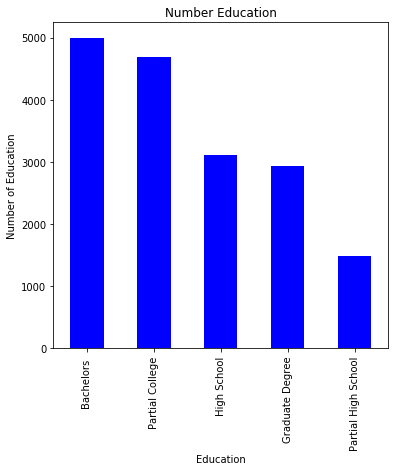

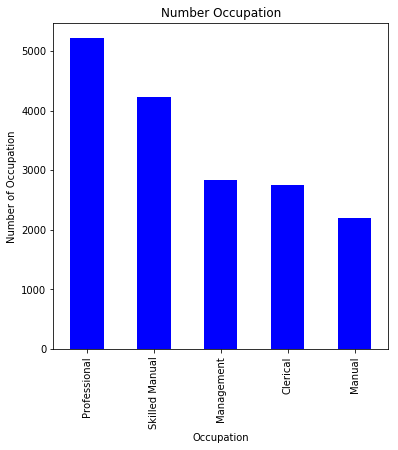

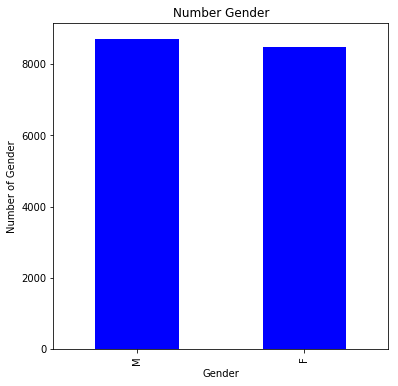

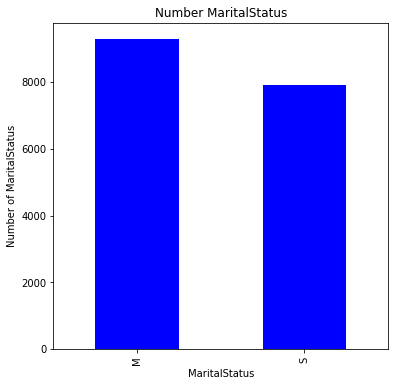

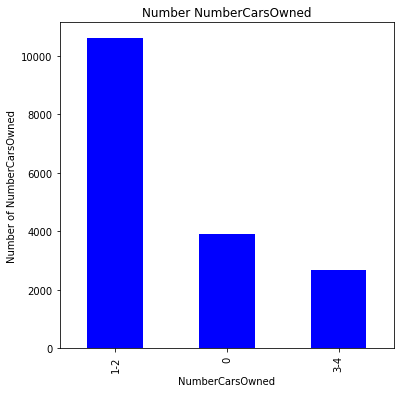

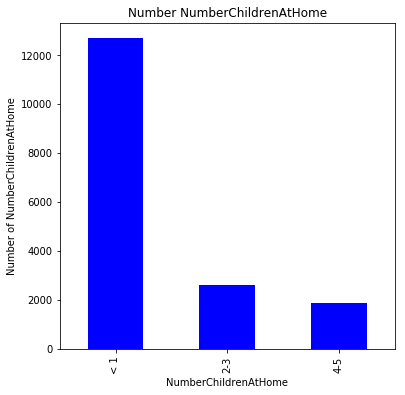

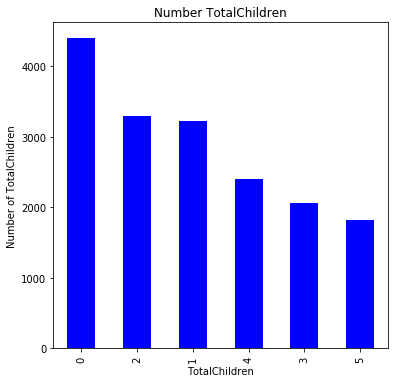

In [9]:
def plot_bars(merged_final, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = merged_final[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of '+ col)# Set text for y axis
        plt.show()

plot_cols = ['Education', 'Occupation', 'Gender', 'MaritalStatus', 
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
plot_bars(merged_final, plot_cols)    

In [10]:
merged_final.columns

Index(['CustomerID', 'City', 'BirthDate', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome',
       'AveMonthSpend'],
      dtype='object')

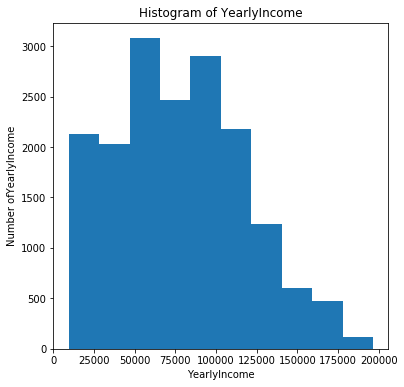

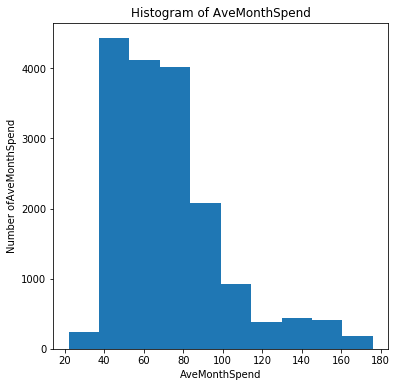

In [11]:
def plot_histogram(merged_final, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        merged_final[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of' +col)# Set text for y axis
        plt.show()
        
num_cols = ['YearlyIncome','AveMonthSpend']    
plot_histogram(merged_final, num_cols)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


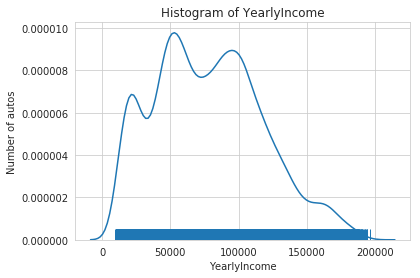

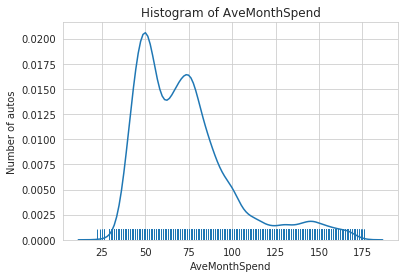

In [12]:
def plot_density_hist(merged_df, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(merged_df[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of autos')# Set text for y axis
        plt.show()
        
plot_density_hist(merged_df, num_cols)    

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


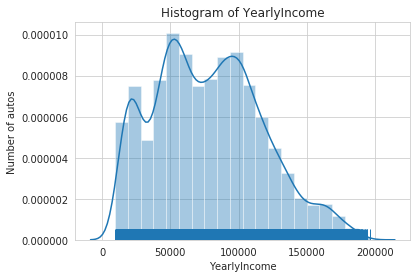

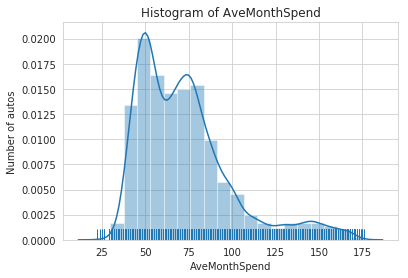

In [13]:
plot_density_hist(merged_df, num_cols, bins = 20, hist = True)        

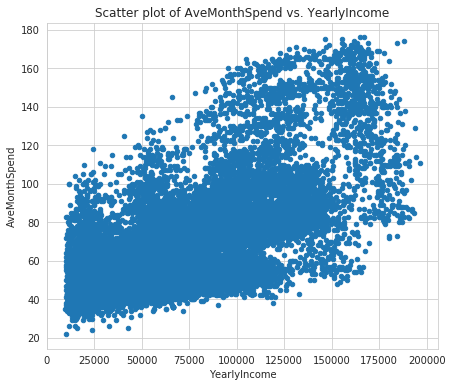

In [14]:
def plot_scatter(merged_final, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        merged_final.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

num_cols = ['YearlyIncome']
plot_scatter(merged_final, num_cols)        

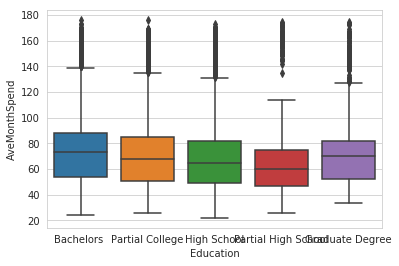

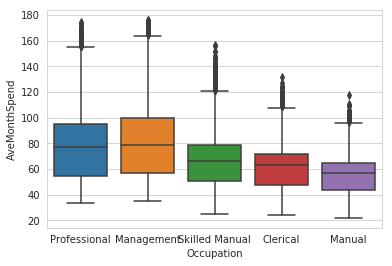

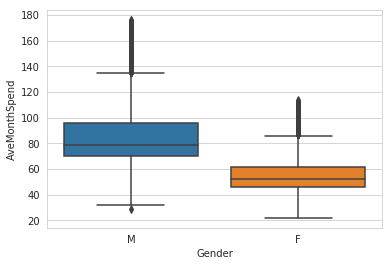

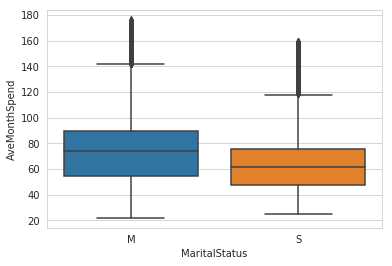

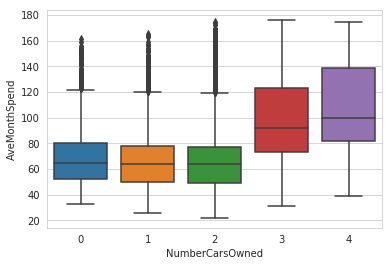

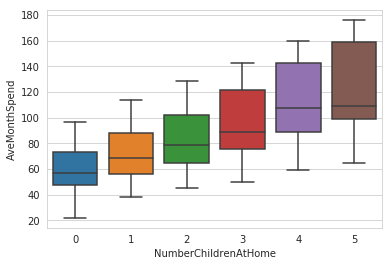

In [15]:
def plot_box(merged_df, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=merged_df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['Education', 'Occupation', 'Gender', 'MaritalStatus','NumberCarsOwned', 
            'NumberChildrenAtHome']
plot_box(merged_df, cat_cols)    

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


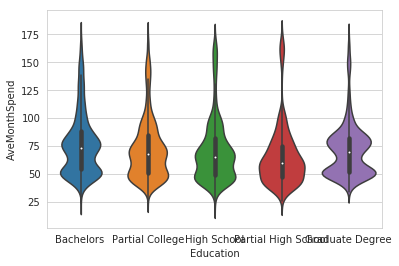

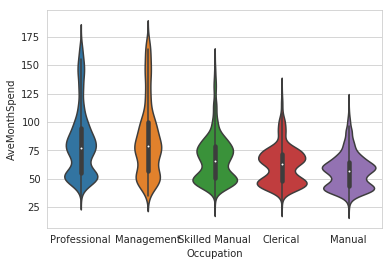

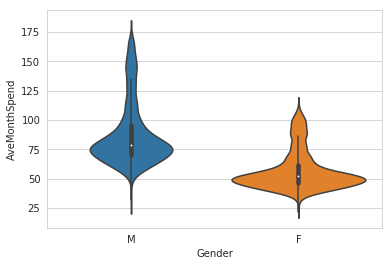

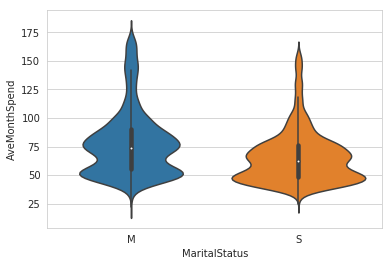

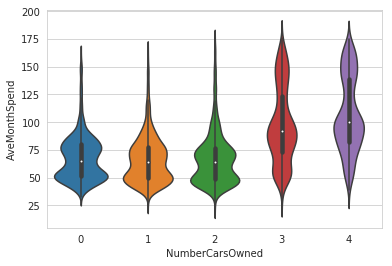

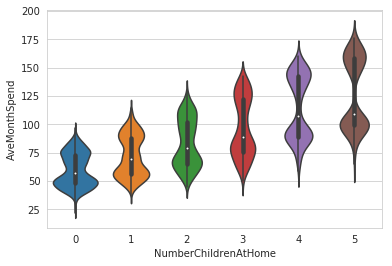

In [16]:
def plot_violin(merged_df, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=merged_df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(merged_df, cat_cols)    

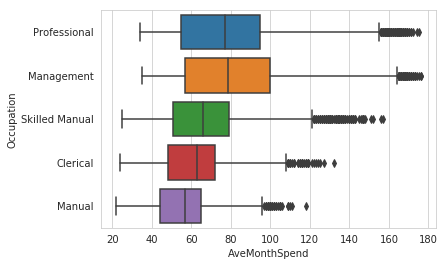

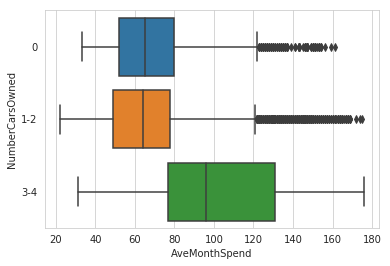

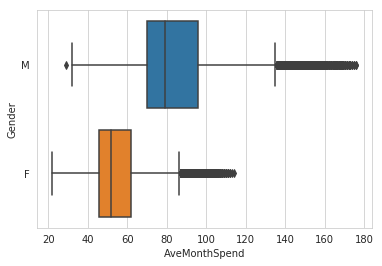

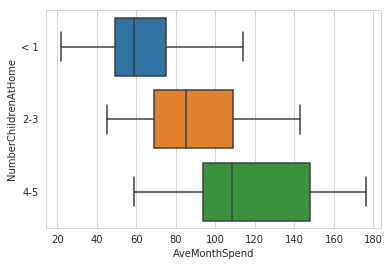

In [17]:
def plot_box(merged_final, cols, col_x = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=merged_final)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['Occupation','NumberCarsOwned','Gender','NumberChildrenAtHome']
plot_box(merged_final, num_cols)

In [18]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Gender', 'MaritalStatus','NumberCarsOwned',
                      'NumberChildrenAtHome']

Features = encode_string(merged_final['Occupation'])
for col in categorical_columns:
    temp = encode_string(merged_final[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :]) 


(17209, 15)
[[0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]]


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [19]:
Features = np.concatenate([Features, np.array(merged_final[['YearlyIncome']])], axis = 1)
print(Features.shape)
print(Features[:2, :])   


(17209, 16)
[[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 1.37947e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.01141e+05]]


In [20]:
labels = np.array(merged_final['AveMonthSpend'])


In [21]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])


In [22]:
scaler = preprocessing.StandardScaler().fit(x_train[:,15:])
x_train[:,15:] = scaler.transform(x_train[:,15:])
x_test[:,15:] = scaler.transform(x_test[:,15:])
print(x_train.shape)
x_train[:5,:]

(17169, 16)


array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.67386188],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.49476552],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.30290358],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.65768478],
       [ 0.        ,  0.        ,  0

In [23]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[-3.42726912e+12 -3.42726912e+12 -3.42726912e+12 -3.42726912e+12
 -3.42726912e+12 -2.13582142e+12 -2.13582142e+12  4.78315541e+12
  4.78315541e+12  3.53086416e+12  3.53086416e+12  3.53086416e+12
 -2.75092904e+12 -2.75092904e+12 -2.75092904e+12  8.00341797e+00]


In [24]:
average_income = lin_mod.predict(x_test)
print(average_income[:])


[ 92.60003662  68.79492188  78.203125    40.31738281 138.69091797
  57.94628906  78.12841797 131.00634766  70.57421875 131.50708008
  78.93847656  65.94750977  76.31958008  45.61132812  68.38678195
  45.69921875  62.95117188  61.61713467  62.15380859 125.29443359
  67.75361378  33.49731445 139.20166016  63.52143275  91.57373047
  84.9621582   86.1171875   48.1953125   77.31640625  86.65771484
 140.61938477  38.98461914  63.27119169 123.09667969  67.38623047
  78.95605469  37.87109375  32.84863281  74.51660156  57.10095215]


In [25]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)    

Mean Square Error      = 109.44514095441968
Root Mean Square Error = 10.461603173243558
Mean Absolute Error    = 7.545133571107549
Median Absolute Error  = 5.123046875
R^2                    = 0.9085170263333083
Adjusted R^2           = 0.702680335583252


/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


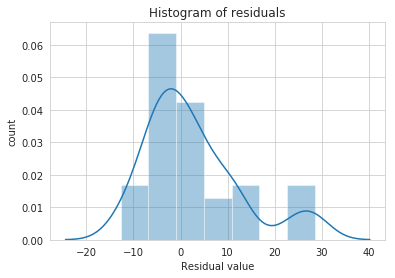

In [26]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

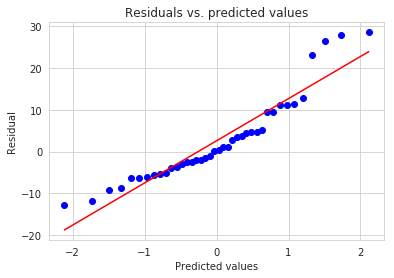

In [27]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

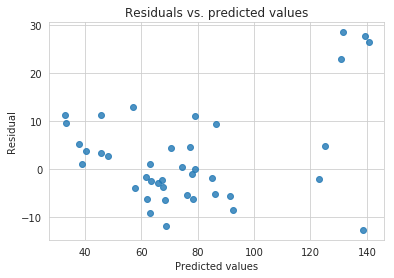

In [28]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

## PREDICTION

In [29]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Gender', 'MaritalStatus','NumberCarsOwned',
                      'NumberChildrenAtHome']

Features1 = encode_string(test['Occupation'])
for col in categorical_columns:
    temp = encode_string(test[col])
    Features1 = np.concatenate([Features1, temp], axis = 1)

print(Features1.shape)
print(Features1[:2, :]) 

(500, 15)
[[0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.]]


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [30]:
Features1 = np.concatenate([Features1, np.array(test[['YearlyIncome']])], axis = 1)
print(Features1.shape)
print(Features1[:2, :])   


(500, 16)
[[0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 8.69310e+04]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00125e+05]]


In [31]:
#scaler = preprocessing.StandardScaler().fit(x_train[:,15:])
Features1[:,15:] = scaler.transform(Features1[:,15:])
Features1[:2,]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.22330898],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.556535  ]])

In [32]:
average_income = lin_mod.predict(Features1)
print(average_income[:])


[ 44.234375   109.46777344  54.39013672  91.30957031  64.76513672
  45.21728516  98.22692241 134.66308594 107.66894531  46.23974609
  49.79003906  52.72119141  75.765625    49.34350586  37.64038086
  54.86865234  88.58007812  75.36274368 104.74121094  62.15332031
  71.01367188  78.00683594 144.50073242  88.29492188  56.43945312
  79.80712891  77.09765625 108.55273438  79.13037109  65.984375
  71.5078125   80.36132812  43.57165527  73.59570312 113.63993305
  94.84130859 142.67260742  84.23339844  59.57434082  77.5625
  47.70117188  85.23911124  83.22070312  51.09277344  47.99462891
  77.61914062  65.65869141  78.82983398 121.33105469  82.6015625
  86.44482422 100.24511719  86.140625    68.81152344  49.95251465
  78.13183594  50.42797852  76.0700082   68.74804688  69.56674974
  46.35058594  68.56054688  83.3137207   74.82714844  34.46582031
  72.94970703  85.46470642 137.29980469  65.85800744 114.38378369
  78.11914062  75.21240234  86.11791992  45.58496094  69.34642441
  77.32861328 117